# K Nearest Neighbors

This project implements the K Nearest Neighbors, classification algorithm from scratch.

This algorithm classifies a datapoint based on the K nearest neighbors of the datapoint. K is simply the amount of neighbors to be considered, which is a pre-selected value that is specified as a parameter. The algorithm simply counts the majority class from the nearest neighbors and assigns the new datapoint this particular class.

In all honesty, the word 'nearest' can mean anything. This implemenation, however, uses the Euclidean distance to determine the nearest neighbors. The following is the formula to calculate the distance between two datapoints, $p$ and $q$:

$$\sqrt{\sum_{i=1}^n(q_i-p_i)^2}$$

where $n$ is the number of features of the dataset. $p_i$ is simply the value of the i'th feature of $p$

In order to classify a datapoint, the algorithm calculates the distance of every pre-classified datapoint, and stores the results into a list. It also generates an auxiliary list containing the indices of all the distances to the pre-classified datapoints. The algorithm then uses quicksort to sort this list and performs every swap to both the distances list and the auxiliary list. The algorithm then picks the first K elements of the auxiliary list to determine the majority class.


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from collections import Counter
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score
from mlxtend.plotting import plot_confusion_matrix
from matplotlib.colors import ListedColormap

In [2]:
class Quick_Sort:
  def __init__(self):
    self.lst = []
    self.inds = []
  
  def sort(self, lst):
    self.lst = lst
    self.inds = [i for i in range(len(self.lst))]
    self._sort(self.lst, 0, len(self.lst)-1)

  def _sort(self, lst, start, end):
    if start >= end: return
    index = self._partition(lst, start, end)
    self._sort(lst, start, index-1)
    self._sort(lst, index+1, end)

  def _partition(self, lst, start, end):
    piv_ind = start
    piv_val = lst[end]
    for i in range(start, end):
      if lst[i] < piv_val:
        self._swap(i, piv_ind)
        piv_ind += 1
    self._swap(piv_ind, end)
    return piv_ind

  def _swap(self, i, j):
    self.lst[i], self.lst[j] = self.lst[j], self.lst[i]
    self.inds[i], self.inds[j] = self.inds[j], self.inds[i]

In [3]:
class KNN:
  def __init__(self, n_neighbors=5):
    self.n_neighbors = n_neighbors
  
  def _euclidean_distance(self, p, q):
    return np.sqrt(np.sum((q-p)**2))
  
  def fit(self, X, y):
    self.X = X
    self.y = y

  def predict(self, X):
    return np.array([self._predict(p) for p in X])

  def _predict(self, p):
    distances = [self._euclidean_distance(p, q) for q in self.X]
    qs = Quick_Sort()
    qs.sort(distances)
    n_nearest_neighbors_indeces = qs.inds[:self.n_neighbors]
    n_nearest_neighbors_y = [self.y[i] for i in n_nearest_neighbors_indeces]
    return Counter(n_nearest_neighbors_y).most_common(1)[0][0]

In [4]:
dataset = load_iris()
X = dataset.data
y = dataset.target

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [6]:
classifier = KNN()
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

In [7]:
print(np.concatenate((y_pred.reshape(len(y_pred), 1), y_test.reshape(len(y_test), 1)), 1))

[[2 2]
 [1 1]
 [0 0]
 [2 2]
 [0 0]
 [2 2]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [2 2]
 [1 1]
 [1 1]
 [1 1]
 [2 1]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [2 2]
 [1 1]
 [0 0]
 [0 0]
 [2 2]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [0 0]]


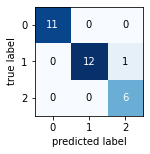

In [8]:
cm = confusion_matrix(y_test, y_pred)
a, b = plot_confusion_matrix(conf_mat=cm, figsize=(2, 2))

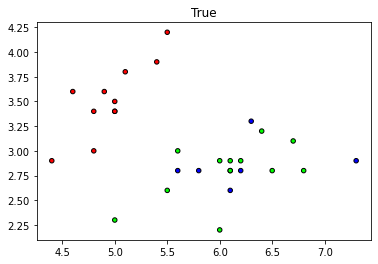

In [9]:
cmap = ListedColormap(['#ff0000', '#00ff00', '#0000ff'])
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cmap, edgecolor='k', s=20)
plt.title('True')
plt.show()

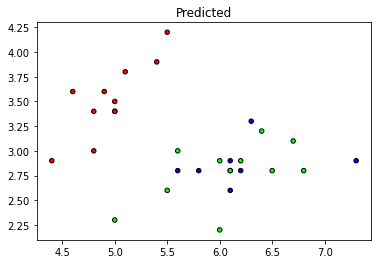

In [10]:
cmap = ListedColormap(['#ff0000', '#00ff00', '#0000ff'])
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_pred, cmap=cmap, edgecolor='k', s=20)
plt.title('Predicted')
plt.show()

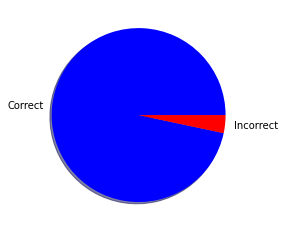

In [11]:
sizes = np.array([cm[0][0]+cm[1][1]+cm[2][2], cm[0][1]+cm[0][2]+cm[1][0]+cm[1][2]+cm[2][0]+cm[2][1]])
labels = 'Correct', 'Incorrect'
colours = ['blue', 'red']

plt.pie(sizes, labels=labels, colors=colours, shadow=True)
plt.show()